## Delivery_time -> Predict delivery time using sorting time

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
df = pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
df.shape

(21, 2)

In [5]:
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Delivery Time,21.0,16.79,5.07,8.0,13.5,17.83,19.75,29.0
Sorting Time,21.0,6.19,2.54,2.0,4.0,6.00,8.00,10.0


In [85]:
df = df.rename({'Delivery Time':'delivery_time'},axis=1)
df = df.rename({'Sorting Time':'sorting_time'},axis=1)
df = df.iloc[:,[1,0]]
df.head()

,sorting_time,delivery_time
0,10,21.00
1,4,13.50
2,6,19.75
3,9,24.00
4,10,29.00


#### Here, sorting_time is the independent variable
#### and delivery_time is the dependent variable

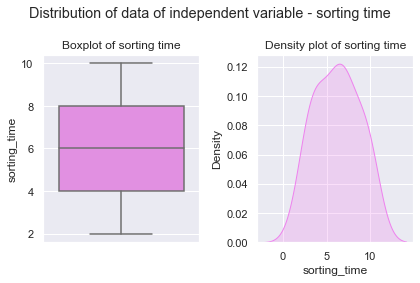

In [53]:
sns.set()
fig,axes=plt.subplots(1,2)
fig.suptitle('Distribution of data of independent variable - sorting time')
sns.boxplot(data=df,y='sorting_time',color='violet',ax=axes[0])
axes[0].set_title('Boxplot of sorting time')
sns.kdeplot(data=df,x='sorting_time',fill=True,color='violet',ax=axes[1])
axes[1].set_title('Density plot of sorting time')
plt.tight_layout();

#### No outliers are detected. And the data has gaussian bell curve.

### Assumptions of Linear Regression
#### -- Linear relationship between the dependent and the independent variables
#### -- Normally distributed error component
#### -- No multicollinearity (applies in case of multiple linear regression)
#### -- No heteroskedasticity, the variance of residuals must be constant across the predicted values

### Check for Linearity

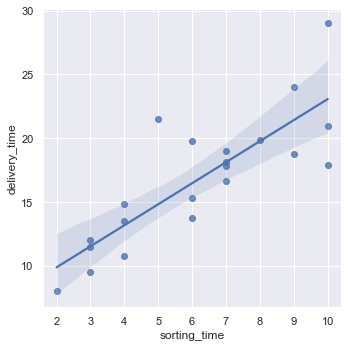

In [55]:
sns.lmplot(x='sorting_time',y='delivery_time',data=df,order=1);

#### Overall the plot shows as sorting time increases delivery time has also increased.
#### So the dependent and independent variable have a linear relationship.

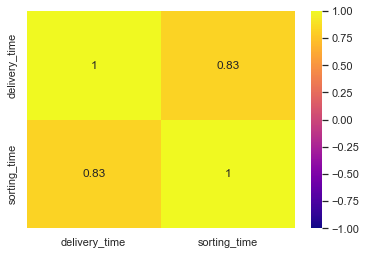

In [14]:
correlation = df.corr()
sns.heatmap(data=correlation,
           vmin=-1,vmax=1,
           cmap='plasma',annot=True);

#### 0.8 shows strong positive correlation between sorting time and delivery time

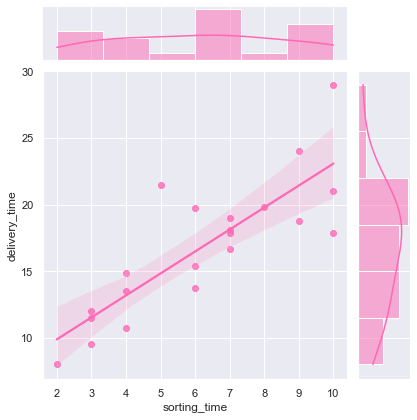

In [16]:
sns.jointplot(data=df,x='sorting_time',y='delivery_time',kind='reg',color='hotpink');

#### We need to find the slope and intercept of the line that best fits these points as per y=mx+c

In [17]:
from sklearn.linear_model import LinearRegression

### Split the dataset into dependent and independent variables as x and y


In [18]:
x = df.drop('delivery_time',axis=1)
y = df['delivery_time']
print('Shape of x=',x.shape)
print('Shape of y=',y.shape)

Shape of x= (21, 1)
Shape of y= (21,)


In [19]:
x.head()

,sorting_time
0,10
1,4
2,6
3,9
4,10


In [20]:
y.head()

0    21.00
1    13.50
2    19.75
3    24.00
4    29.00
Name: delivery_time, dtype: float64

In [86]:
lr = LinearRegression().fit(x,y)
print('Slope/Steepness of the line given by Regression coefficient =',lr.coef_)
print('The value of y when x=0 ie. Intercept =',lr.intercept_)
print('R Squared value =',lr.score(x,y))

Slope/Steepness of the line given by Regression coefficient = [1.6490199]
The value of y when x=0 ie. Intercept = 6.58273397199706
R Squared value = 0.6822714748417231


#### R squared value evaluates the performance of the model,  
#### shows the percentage of data points that conform to the best fit line.
#### R squared value of 0.68 means the model is worthy of attention.
#### 0.68 shows the moderate positive relationship between the two variables.

In [87]:
df['predicted_delivery_time'] = lr.predict(x)
df['error/residuals'] = df['delivery_time']-df['predicted_delivery_time']
df

,sorting_time,delivery_time,predicted_delivery_time,error/residuals
0,10,21.00,23.072933,-2.072933
1,4,13.50,13.178814,0.321186
2,6,19.75,16.476853,3.273147
3,9,24.00,21.423913,2.576087
4,10,29.00,23.072933,5.927067
5,6,15.35,16.476853,-1.126853
6,7,19.00,18.125873,0.874127
7,3,9.50,11.529794,-2.029794
8,10,17.90,23.072933,-5.172933
9,9,18.75,21.423913,-2.673913


### Log transformation
#### we can try log transformation of both x and y to improve R squared value.

In [117]:
df['log_sorting_time'] = np.log(df['sorting_time'])
df['log_delivery_time'] = np.log(df['delivery_time'])

lr_log = LinearRegression().fit(df[['log_sorting_time']],df['log_delivery_time'])

print('Slope/Steepness of the line given by Regression coefficient =',lr_log.coef_)
print('The value of y when x=0 ie. Intercept =',lr_log.intercept_)
print('R Squared value =',lr_log.score(df[['log_sorting_time']],df['log_delivery_time']))
print('Previously R squared value was 0.68, now it has improved to 0.77')

df['log_pred_delivery_time'] = lr_log.predict(df[['log_sorting_time']])
df['log_error/residuals'] = df['log_delivery_time']-df['log_pred_delivery_time']
df.head()

Slope/Steepness of the line given by Regression coefficient = [0.59752233]
The value of y when x=0 ie. Intercept = 1.7419870888672382
R Squared value = 0.77216134926874
Previously R squared value was 0.68, now it has improved to 0.77


,sorting_time,delivery_time,predicted_delivery_time,error/residuals,log_sorting_time,log_delivery_time,log_pred_delivery_time,log_error/residuals
0,10,21.00,23.072933,-2.072933,2.302585,3.044522,3.117833,-0.073311
1,4,13.50,13.178814,0.321186,1.386294,2.602690,2.570329,0.032361
2,6,19.75,16.476853,3.273147,1.791759,2.983153,2.812603,0.170550
3,9,24.00,21.423913,2.576087,2.197225,3.178054,3.054878,0.123176
4,10,29.00,23.072933,5.927067,2.302585,3.367296,3.117833,0.249463


### Linearity check

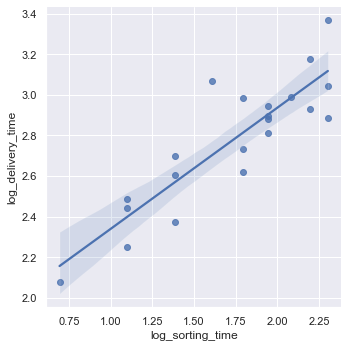

In [103]:
sns.lmplot(x='log_sorting_time',y='log_delivery_time',data=df,order=1);

### Linear Regression plot

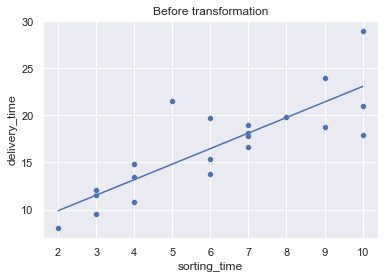

In [125]:
sns.scatterplot(x='sorting_time',y='delivery_time',data=df)
sns.lineplot(data=df,x='sorting_time',y='predicted_delivery_time')
plt.title('Before transformation');

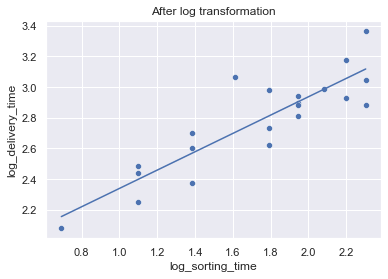

In [126]:
sns.scatterplot(x='log_sorting_time',y='log_delivery_time',data=df)
sns.lineplot(data=df,x='log_sorting_time',y='log_pred_delivery_time')
plt.title('After log transformation');

### Check whether error component is normally distributed

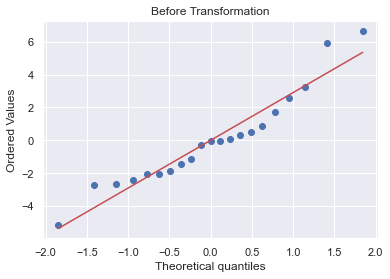

In [110]:
from scipy import stats
stats.probplot(df['error/residuals'],dist='norm',plot=plt)
plt.title('Before Transformation');

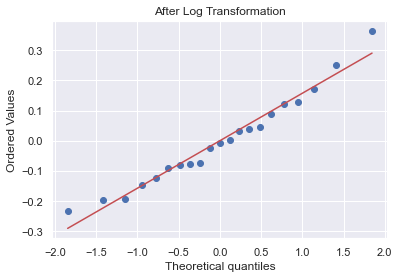

In [111]:
stats.probplot(df['log_error/residuals'],dist='norm',plot=plt)
plt.title('After Log Transformation');

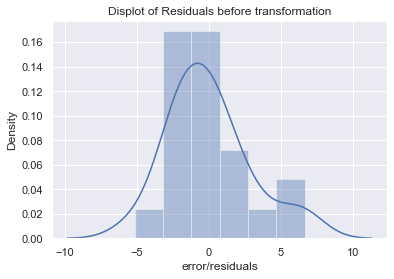

In [114]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.distplot(df['error/residuals'],kde=True)
plt.title('Displot of Residuals before transformation');

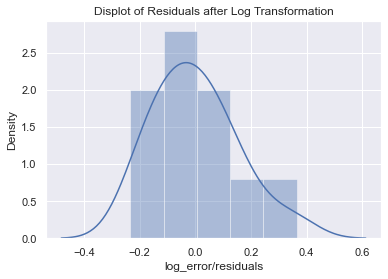

In [115]:
sns.distplot(df['log_error/residuals'],kde=True)
plt.title('Displot of Residuals after Log Transformation');

#### After log transformation error/residuals is even more normally distributed.

### Check for No heteroskedasticity
#### Residual analysis is done by plotting error/residuals on y axis and the fitted value(independent variable) on x axis.

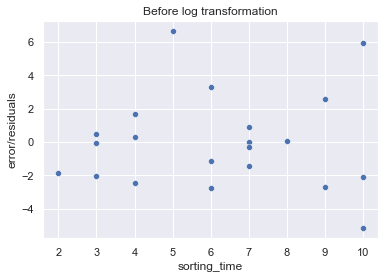

In [118]:
sns.scatterplot(x='sorting_time',y='error/residuals',data=df)
plt.title('Before log transformation');

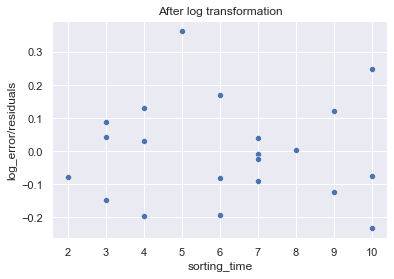

In [119]:
sns.scatterplot(x='sorting_time',y='log_error/residuals',data=df)
plt.title('After log transformation');

#### Homoscedasticity --> means the variance of the error terms must be constant and they have a mean of zero.
#### here too the errors have constant variance with the residual values scattered randomly around zero. There is no particular pattern of increase or decrease of residuals with the fitted values.
#### So the model satisfies the assumption of Homoscedasticity.

### Dataframe of predicted delivery time before and after log transformation

In [121]:
df_pred = df.iloc[:,[0,1,2]].copy()
pr = np.exp(df['log_pred_delivery_time'])
df_pred['log_predicted_delivery_time'] = pr
df_pred

,sorting_time,delivery_time,predicted_delivery_time,log_predicted_delivery_time
0,10,21.00,23.072933,22.597360
1,4,13.50,13.178814,13.070123
2,6,19.75,16.476853,16.653216
3,9,24.00,21.423913,21.218593
4,10,29.00,23.072933,22.597360
5,6,15.35,16.476853,16.653216
6,7,19.00,18.125873,18.259981
7,3,9.50,11.529794,11.005911
8,10,17.90,23.072933,22.597360
9,9,18.75,21.423913,21.218593


## By using statsmodels.formula.api (another method)

### Log transformation

In [30]:
import statsmodels.formula.api as smf

In [44]:
df1 = pd.read_csv('delivery_time.csv')
df1 = df1.rename({'Delivery Time':'delivery_time'},axis=1)
df1 = df1.rename({'Sorting Time':'sorting_time'},axis=1)
df1 = df1.iloc[:,[1,0]]
x1 = df1.sorting_time
y1 = df1.delivery_time

In [123]:
model = smf.ols('np.log(y1)~np.log(x1)',df1).fit()
print('Slope/Regression coefficient =',model.params[0])
print('Intercept =',model.params[1])
df1['predicted_delivery_time'] = np.exp(model.predict(df1))
df1.head()

Slope/Regression coefficient = 1.7419870888672389
Intercept = 0.5975223286185796


,sorting_time,delivery_time,predicted_delivery_time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360


In [124]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(y1)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           1.60e-07
Time:                        00:54:31   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
np.log(x1)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Square root transformation

In [154]:
model1 = smf.ols('np.sqrt(delivery_time)~np.sqrt(sorting_time)', df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(delivery_time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Mon, 07 Nov 2022   Prob (F-statistic):           8.48e-07
Time:                            06:13:28   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(sorting_time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The R squared value is 0.729 which is less than log transformation.

### Cube root transformation

In [155]:
model2 = smf.ols('np.cbrt(delivery_time)~np.cbrt(sorting_time)', df1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(delivery_time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Mon, 07 Nov 2022   Prob (F-statistic):           4.90e-07
Time:                            06:16:59   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(sorting_time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### R squared value is 0.744

### So comparing to other models log tranformation model has performed well.

### Test with custom data

In [151]:
import warnings
warnings.filterwarnings("ignore")
st = 12
lr_log.predict([[st]])[0]
print(f"Delivery time for sorting time = {st} is {np.round(float(np.exp((lr_log.predict([[np.log(st)]])[0]))),2)}")

Delivery time for sorting time = 12 is 25.2


In [150]:
st = 15
lr_log.predict([[st]])[0]
print(f"Delivery time for sorting time = {st} is {np.round(float(np.exp((lr_log.predict([[np.log(st)]])[0]))),2)}")

Delivery time for sorting time = 15 is 28.79
